# Import the raw data 
Source: https://www.eia.gov/electricity/wholesale/

In [40]:
# Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First let's analyze the 2024 data. I use Pandas to load and visualize the data. 

In [ ]:
import pandas as pd

# Load the 2024 data
folder_path = "../data/raw/"
file_name = "ice_electric-2024final.xlsx"

# Create dataframe
df = pd.read_excel(folder_path + file_name)

# Rename the columns to be more code-friendly
df.columns = [
    "price_hub", "trade_date", "delivery_start_date", "delivery_end_date",
    "high_price", "low_price", "avg_price", "price_change",
    "daily_volume", "num_trades", "num_counterparties"
]
# Convert dates to datetime
df["trade_date"] = pd.to_datetime(df["trade_date"])
df["delivery_start_date"] = pd.to_datetime(df["delivery_start_date"])
df["delivery_end_date"] = pd.to_datetime(df["delivery_end_date"])
# Set trade date as index
df.set_index("trade_date", inplace=True)

# Sort by date (nice when plotting)
df.sort_index(inplace=True)

df.head(n=3)

,price_hub,delivery_start_date,delivery_end_date,high_price,low_price,avg_price,price_change,daily_volume,num_trades,num_counterparties
trade_date,,,,,,,,,,
2023-12-27,Mid C Peak,2023-12-28,2023-12-29,37.50,34.0,35.27,-0.93,9600,12,11
2023-12-27,SP15 EZ Gen DA LMP Peak,2023-12-28,2023-12-29,38.50,37.5,38.00,3.00,1600,2,3
2023-12-27,Nepool MH DA LMP Peak,2023-12-28,2023-12-28,30.25,30.0,30.06,-23.94,3200,4,6


In [26]:
# Replace NaNs using forward fill (i.e. replace NaNs with the previous valid value)
print("Number of missing values:\n", df.isnull().sum())
df.ffill();

Number of missing values:
 price_hub              0
delivery_start_date    0
delivery_end_date      0
high_price             2
low_price              0
avg_price              0
price_change           0
daily_volume           0
num_trades             0
num_counterparties     0
dtype: int64


c:\Users\tobia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tobia\AppData\Local\Temp\ipykernel_23988\3176477493.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


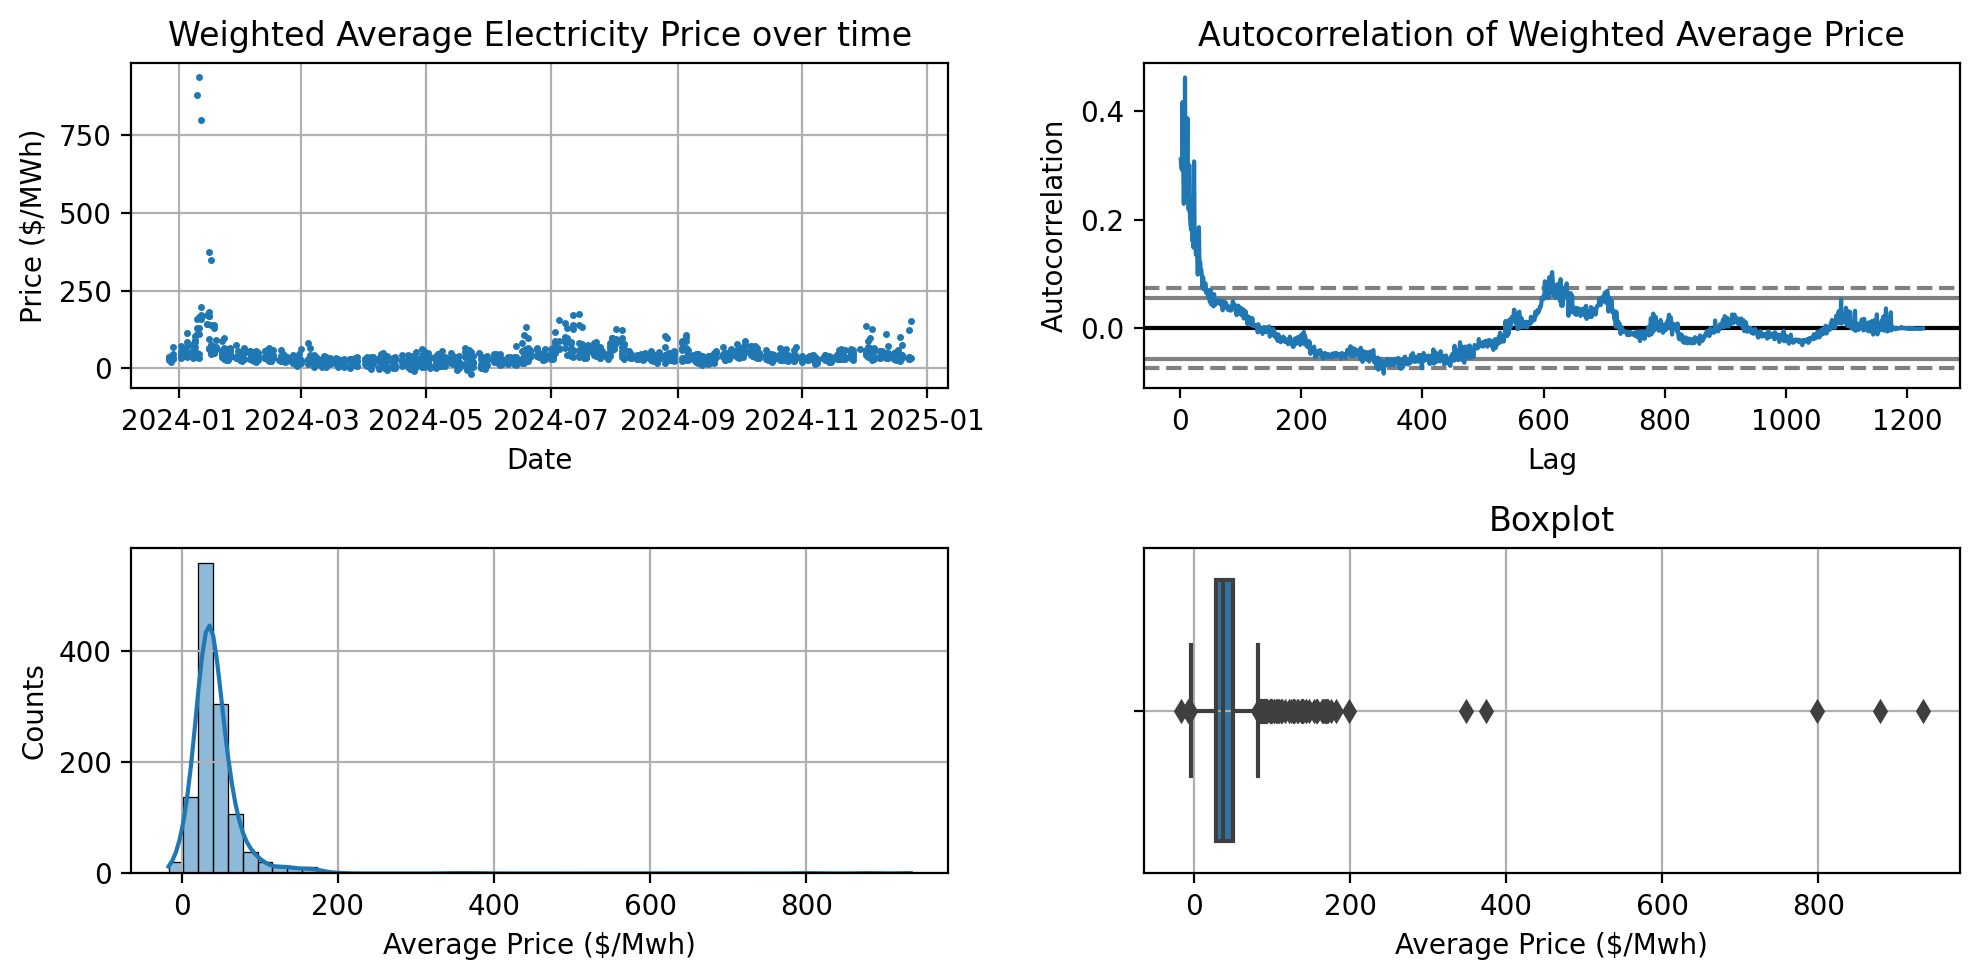

In [53]:
# Visualize data using matplotlib

fig, ax_arr = plt.subplots(figsize=(10, 5), nrows=2, ncols=2, dpi=200)
ax = ax_arr[0, 0]
ax_dist = ax_arr[1, 0]
ax_autocorr = ax_arr[0, 1]
ax_boxplot = ax_arr[1, 1]

# Time series
ax.plot(df["avg_price"], ".", markersize=3)
ax.set(xlabel="Date", ylabel="Price ($/MWh)", title="Weighted Average Electricity Price over time")
ax.grid()

# Price distribution
sns.histplot(df["avg_price"], 
             bins=50, 
             kde=True,
             ax=ax_dist)
ax_dist.set(xlabel="Average Price ($/Mwh)", ylabel="Counts")
ax_dist.grid()

# Autocorrelation
pd.plotting.autocorrelation_plot(df["avg_price"], ax=ax_autocorr)
ax_autocorr.grid()
ax_autocorr.set(title="Autocorrelation of Weighted Average Price")

# Boxplot for potential anomalies
sns.boxplot(x=df["avg_price"], ax=ax_boxplot)
ax_boxplot.grid()
ax_boxplot.set(xlabel="Average Price ($/Mwh)", title="Boxplot")

fig.tight_layout()
fig.show()